In [1]:
import pandas as pd
import re
import nltk
import os
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords

# NLTK stopword listesini indir (eÄŸer daha Ã¶nce indirilmemiÅŸse)
#nltk.download('stopwords')

# Set the path as tangible
os.chdir('..')

# Check current path 
print(os.getcwd())

# Visualization
from src.visualization import plot_frequency_heatmap

c:\Users\user\Documents\Python Projects\tangible


In [ ]:
# Read the text file
#file_path = 'data/ankara_oe/article_1977_1.txt'
file_path = 'data/ankara_oe/article_2024_4.txt'
base_name = os.path.basename(file_path)
document_name = os.path.splitext(base_name)[0]
print("Document: " + document_name)

# Metin dosyasÄ±
with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

#stop_words = set(stopwords.words('turkish'))
custom_stopwords = set([
    "ama", "bir", "bu", "Ã§ok", "daha", "gibi", "iÃ§in", "ile", "ise", "Ã¶nemli",  "ÅŸu", "ve"
])

# Metni kÃ¼Ã§Ã¼k harfe Ã§evirme ve temizleme
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Noktalama iÅŸaretlerini kaldÄ±r

# Kelimeleri tokenize et ve stopwordâ€™leri kaldÄ±r
tokens = [word for word in text.split() if word not in custom_stopwords]

# Unigram, bigram ve trigramlarÄ± oluÅŸtur
unigrams = tokens
#print(type(unigrams))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
quadrigram = list(ngrams(tokens, 4))

# FrekanslarÄ± hesapla
unigram_freq = Counter(unigrams)
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)
quadrigram_freq = Counter(quadrigram)

# En sÄ±k geÃ§enleri seÃ§
#top_unigrams = unigram_freq.most_common(10)
top_bigrams = bigram_freq.most_common(10)
top_trigrams = trigram_freq.most_common(10)
top_quadrigrams = quadrigram_freq.most_common(10)

# SonuÃ§larÄ± DataFrame olarak hazÄ±rlama
df_unigram = pd.DataFrame(unigram_freq.items(), columns=["Unigram", "Frekans"]).sort_values(by="Frekans", ascending=False)

df_bigram = pd.DataFrame([" ".join(bigram) for bigram, freq in top_bigrams], columns=["Bigram"])
df_bigram["Frekans"] = [freq for bigram, freq in top_bigrams]

df_trigram = pd.DataFrame([" ".join(trigram) for trigram, freq in top_trigrams], columns=["Trigram"])
df_trigram["Frekans"] = [freq for trigram, freq in top_trigrams]

df_quadrigram = pd.DataFrame(quadrigram_freq.items(), columns=["Quadrigram", "Frekans"]).sort_values(by="Frekans", ascending=False)

# UnigramlarÄ± GÃ¶rÃ¼ntÃ¼le
#print("\nðŸ”¹ Unigram FrekanslarÄ±:")
#print(df_unigram)

# BigramlarÄ± GÃ¶rÃ¼ntÃ¼le
#print("\nðŸ”¹ Bigram FrekanslarÄ±:")
#print(df_bigram)

# **TrigramlarÄ± GÃ¶rÃ¼ntÃ¼le**
#print("\nðŸ”¹ Trigram FrekanslarÄ±:")
#print(df_trigram)

# QuadrigramlarÄ± GÃ¶rÃ¼ntÃ¼le
print("\nðŸ”¹ Quadrigram FrekanslarÄ±:")
print(df_quadrigram)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=list(stop_words))
tfidf_matrix = vectorizer.fit_transform([text])

# Kelimelerin Ã¶nem sÄ±rasÄ±na gÃ¶re alÄ±nmasÄ±
feature_names = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray().flatten()

# En Ã¶nemli kelimeleri sÄ±ralama
important_terms = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)

# Tablo olarak gÃ¶sterme
df_tfidf = pd.DataFrame(important_terms, columns=["Terim", "TF-IDF Skoru"])
df_tfidf = df_tfidf.sort_values(by="TF-IDF Skoru", ascending=False)
print(df_tfidf.shape)
print(df_tfidf)


In [2]:
# Anahtar SÃ¶zcÃ¼kler
keywords = [
    "az",
    "bÃ¼tÃ¼nleÅŸtirme"
    "gÃ¶rme",
    "kaynaÅŸtÄ±rma",
    "otizm",
    "Ã¶zel",
    "yetersizli",
    "zihin"
]

# **Ã–nemli terimleri filtreleme (TF-IDF sonucundan)**
filtered_terms = [term for term, score in important_terms if any(keyword in term for keyword in keywords)]

# **Sonucu DataFrame olarak saklama**
df_filtered = pd.DataFrame(filtered_terms, columns=["Ã–zel EÄŸitim Terimleri"])

# **FrekanslarÄ± hesaplama (unigram, bigram, trigram iÃ§inde arama)**
filtered_frequencies = {}

for term in df_filtered["Ã–zel EÄŸitim Terimleri"]:
    # Unigram frekansÄ±
    unigram_count = unigram_freq.get(term, 0)
    # Bigram frekansÄ±
    bigram_count = bigram_freq.get(tuple(term.split()), 0)
    # Trigram frekansÄ±
    trigram_count = trigram_freq.get(tuple(term.split()), 0)

    # Toplam frekans
    total_count = unigram_count + bigram_count + trigram_count
    filtered_frequencies[term] = total_count

# **Yeni DataFrame oluÅŸtur (terimler ve frekanslarÄ±)**
df_final = pd.DataFrame(filtered_frequencies.items(), columns=["Terim", "Frekans"])

# **Sonucu gÃ¶sterme**
print("\nðŸ”¹ FiltrelenmiÅŸ Terimlerin FrekanslarÄ±:")
print(df_final)


NameError: name 'important_terms' is not defined

In [2]:
# Read the text file
#file_path = 'data/ankara_oe/article_1977_1.txt'
file_path = 'data/ankara_oe/article_1977_1.txt'
base_name = os.path.basename(file_path)
document_name = os.path.splitext(base_name)[0]
print("Document: " + document_name)

# Metin dosyasÄ±
with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

#stop_words = set(stopwords.words('turkish'))
custom_stopwords = set([
    "ama", "bir", "bu", "Ã§ok", "daha", "gibi", "iÃ§in", "ile", "ise", "Ã¶nemli",  "ÅŸu", "ve"
])

# Metni kÃ¼Ã§Ã¼k harfe Ã§evirme ve temizleme
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Noktalama iÅŸaretlerini kaldÄ±r

# Kelimeleri tokenize et ve stopwordâ€™leri kaldÄ±r
tokens = [word for word in text.split() if word not in custom_stopwords]

# ðŸ”¹ Analiz edilecek Ã¶zel eÄŸitim terimleri
special_ed_terms = [
    "arÄ±za", "arÄ±zalÄ±",
    "az gÃ¶ren",
    "bireysel", "bireysel farklÄ±lÄ±k", "bireyselleÅŸtirme", "bireyselleÅŸtirilmiÅŸ",
    "bireyselleÅŸtirilmiÅŸ eÄŸitim", "bireysel eÄŸitim",
    "bireyselleÅŸtirilmiÅŸ eÄŸitim programÄ±", "bireyselleÅŸtirilmiÅŸ eÄŸitim planÄ±",
    "destek eÄŸitim", "destek eÄŸitim odasÄ±", "kaynak oda",
    "dikkat eksikliÄŸi", "dikkat eksikliÄŸi ve hiperaktivite bozukluÄŸu", "dikkat eksikliÄŸi ve hiperaktivite bozukluÄŸu olan",
    "disleksi",
    "engel", "engelli", "engeli olan", "sakat",
    "gÃ¶rme engelli", "kÃ¶r", "Ã¢mÃ¢", "gÃ¶rme kaybÄ±", "gÃ¶rme kayÄ±plÄ±", "gÃ¶rme kaybÄ± olan", "gÃ¶rme Ã¶zÃ¼rlÃ¼", "gÃ¶rme engeli", "gÃ¶rme yetersizliÄŸi", "gÃ¶rme yetersizliÄŸi olan",
    "iÅŸitme engelli", "saÄŸÄ±r", "ahraz", "iÅŸitme kaybÄ±", "iÅŸitme kayÄ±plÄ±", "iÅŸitme kaybÄ± olan", "iÅŸitme Ã¶zÃ¼rlÃ¼", "iÅŸitme engeli", "iÅŸitme yetersizliÄŸi", "iÅŸitme yetersizliÄŸi olan",
    "otizm", "otistik", "otizm spektrum bozukluÄŸu",
    "Ã¶zel eÄŸitim",
    "Ã¶zel eÄŸitim hizmet",
    "Ã¶zel gereksinim", "Ã¶zel gereksinimli", "Ã¶zel eÄŸitime ihtiyacÄ± olan", "Ã¶zel eÄŸitime muhtaÃ§",
    "Ã¶zÃ¼r", "Ã¶zÃ¼rlÃ¼", "birden fazla Ã¶zÃ¼r",
    "rehabilitasyon",
    "yetersizlik", "yetersizliÄŸi olan",
    "zeka geriliÄŸi", "geri zekÃ¢lÄ±", "geri zekalÄ±",
    "zihin yetersizliÄŸi", "zihinsel yetersizlik", "zihin yetersizliÄŸi olan", "zihinsel yetersizliÄŸi olan"
]

# ðŸ”¹ Terimlerin frekanslarÄ±nÄ± hesaplama
term_frequencies = {}

for term in special_ed_terms:
    term_words = term.split()  # Terimi kelimelerine ayÄ±r
    term_length = len(term_words)  # KaÃ§ kelimeden oluÅŸtuÄŸunu Ã¶ÄŸren
    matched_positions = set()  # **Tekrar sayÄ±lmasÄ±nÄ± Ã¶nlemek iÃ§in bir set kullanÄ±yoruz**

    # ðŸ”¹ EÄŸer terim tek kelimeden oluÅŸuyorsa, baÅŸÄ±nda geÃ§tiÄŸi kelimeleri tarayalÄ±m
    if term_length == 1:
        base_word = term_words[0]  # Tek kelime
        for i in range(len(tokens)):
            if tokens[i].startswith(base_word):  # **BaÅŸlangÄ±Ã§ta geÃ§iyor mu?**
                matched_positions.add(i)

    # ðŸ”¹ EÄŸer terim birden fazla kelime iÃ§eriyorsa, son kelimenin baÅŸÄ±na eklenmiÅŸ halleri tarayalÄ±m
    else:
        base_word = term_words[-1]  # **Son kelimeyi al**
        for i in range(len(tokens) - term_length + 1):
            if tokens[i:i + term_length - 1] == term_words[:-1] and tokens[i + term_length - 1].startswith(base_word):
                matched_positions.add(i)

    # **FrekansÄ± kaydet**
    term_frequencies[term] = len(matched_positions)

# **SonuÃ§larÄ± DataFrame olarak kaydet**
df_special_terms = pd.DataFrame(term_frequencies.items(), columns=["Terim", "Frekans"]).sort_values(by="Frekans", ascending=False)
df_special_terms['Source'] = document_name

# **SonuÃ§larÄ± gÃ¶sterme**
print("\nðŸ”¹ Ã–zel EÄŸitim Terimlerinin FrekanslarÄ±:")
print(df_special_terms[df_special_terms["Frekans"] > 0])
print(df_special_terms[df_special_terms["Frekans"] > 0].shape)

# CSV dosyasÄ±na kaydet
"""csv_path = 'data/ankara_oe/word_frequencies_ankara.csv'
if not os.path.exists(csv_path):
    # CSV yoksa oluÅŸtur (header dahil)
    df_special_terms.to_csv(csv_path, index=False, encoding='utf-8')
else:
    # CSV varsa oku ve birleÅŸtir (append)
    existing_df = pd.read_csv(csv_path)
    combined_df = pd.concat([existing_df, df_special_terms], ignore_index=True)
    combined_df.to_csv(csv_path, index=False, encoding='utf-8')
"""


Document: article_1977_1

ðŸ”¹ Ã–zel EÄŸitim Terimlerinin FrekanslarÄ±:
                         Terim  Frekans          Source
51                        Ã¶zÃ¼r       75  article_1977_1
45                 Ã¶zel eÄŸitim       71  article_1977_1
33                       saÄŸÄ±r       58  article_1977_1
23                         kÃ¶r       56  article_1977_1
58                 geri zekÃ¢lÄ±       42  article_1977_1
0                        arÄ±za       34  article_1977_1
21                       sakat       34  article_1977_1
52                      Ã¶zÃ¼rlÃ¼       20  article_1977_1
1                      arÄ±zalÄ±       10  article_1977_1
55                 yetersizlik        8  article_1977_1
56           yetersizliÄŸi olan        7  article_1977_1
50         Ã¶zel eÄŸitime muhtaÃ§        7  article_1977_1
54              rehabilitasyon        6  article_1977_1
2                     az gÃ¶ren        5  article_1977_1
59                 geri zekalÄ±        4  article_1977_1
28         

"csv_path = 'data/ankara_oe/word_frequencies_ankara.csv'\nif not os.path.exists(csv_path):\n    # CSV yoksa oluÅŸtur (header dahil)\n    df_special_terms.to_csv(csv_path, index=False, encoding='utf-8')\nelse:\n    # CSV varsa oku ve birleÅŸtir (append)\n    existing_df = pd.read_csv(csv_path)\n    combined_df = pd.concat([existing_df, df_special_terms], ignore_index=True)\n    combined_df.to_csv(csv_path, index=False, encoding='utf-8')\n"

     Year                Terim  Frekans
0    1977                ahraz        4
1    1977                arÄ±za       34
2    1977              arÄ±zalÄ±       10
3    1977             az gÃ¶ren        5
4    1977    birden fazla Ã¶zÃ¼r        1
..    ...                  ...      ...
123  2024  Ã¶zel eÄŸitime muhtaÃ§        0
124  2024      Ã¶zel gereksinim       40
125  2024    Ã¶zel gereksinimli       31
126  2024                 Ã¶zÃ¼r        0
127  2024               Ã¶zÃ¼rlÃ¼        0

[128 rows x 3 columns]


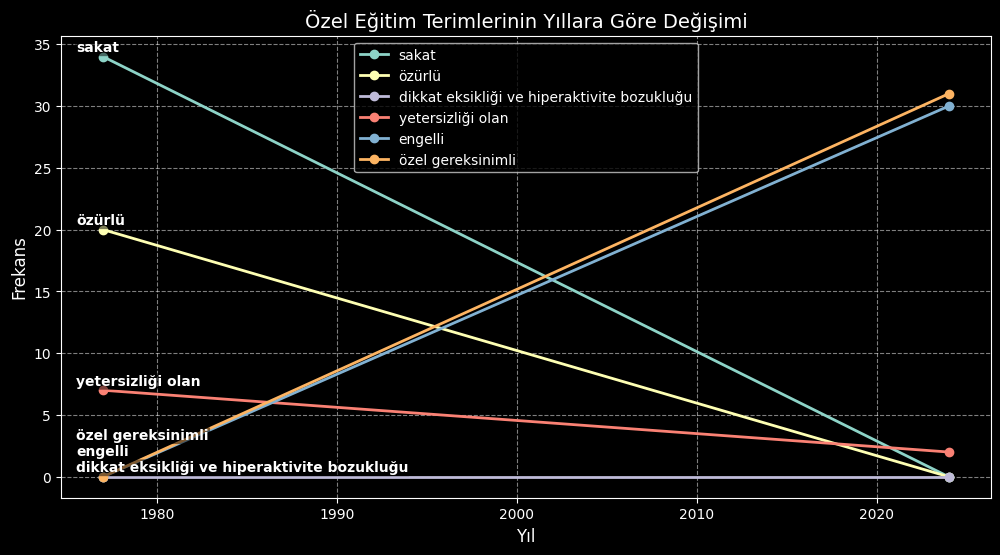

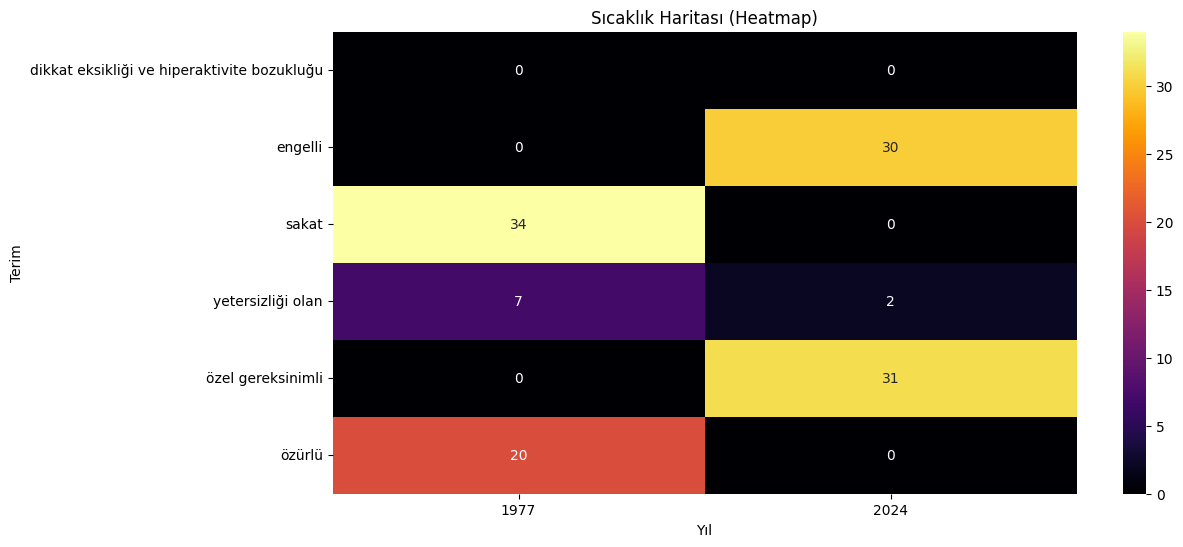

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yÃ¼kleme
file_path = "data/ankara_oe/word_frequencies_ankara.csv"
df = pd.read_csv(file_path)

# YÄ±l bilgisini Source sÃ¼tunundan Ã§Ä±kartma
df["Year"] = df["Source"].str.extract(r"article_(\d{4})_")

# YÄ±la gÃ¶re toplam frekans hesaplama
df_terms_yearly = df.groupby(["Year", "Terim"])["Frekans"].sum().reset_index()

# **SonuÃ§larÄ± gÃ¶sterme**
print(df_terms_yearly)

# Analiz edilecek bazÄ± terimleri seÃ§me
selected_terms = ["sakat", "Ã¶zÃ¼rlÃ¼", "engelli", "yetersizliÄŸi olan", "Ã¶zel gereksinimli"]

# Ã‡izgi grafiÄŸi 
# Dark theme
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

plt.figure(figsize=(12, 6))

# YÄ±l sÃ¼tununun integer olduÄŸundan emin ol
df_terms_yearly["Year"] = df_terms_yearly["Year"].astype(int)

# **Son yÄ±lÄ±n frekanslarÄ±nÄ± hesapla ve en yÃ¼ksekten en dÃ¼ÅŸÃ¼ÄŸe sÄ±rala**
latest_year = df_terms_yearly["Year"].max()
last_year_frequencies = df_terms_yearly[df_terms_yearly["Year"] == latest_year].set_index("Terim")["Frekans"].to_dict()

# **SÄ±ralama: En yÃ¼ksek frekanstan en dÃ¼ÅŸÃ¼k frekansa**
sorted_terms = sorted(selected_terms, key=lambda t: last_year_frequencies.get(t, 0), reverse=False)

# **Etiketlerin Ã¼st Ã¼ste binmesini Ã¶nlemek iÃ§in**
used_positions = set()
min_spacing = 1.3  # Etiketler arasÄ±nda en az kaÃ§ birim boÅŸluk olacak

for term in sorted_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.plot(subset["Year"], subset["Frekans"], marker="o", linestyle="-", linewidth=2, markersize=6, label=term)

    # Ä°lk yÄ±lÄ±n deÄŸerini al
    first_row = subset.iloc[0]
    label_x = int(first_row["Year"])
    label_y = first_row["Frekans"]

    # **EÄŸer aynÄ± y ekseninde baÅŸka bir etiket varsa, en yakÄ±n boÅŸ yeri bul ve kaydÄ±r**
    while label_y in used_positions:
        label_y += min_spacing

    used_positions.add(label_y)

    # **Etiketi ilk yÄ±lÄ±n iÃ§ine biraz girintili yerleÅŸtir**
    plt.text(label_x - 1.5, label_y + 0.4, term, fontsize=10, ha="left", color="white", fontweight="bold",
             bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", boxstyle="round,pad=0.1"))

plt.xlabel("YÄ±l", fontsize=12, color="white")
plt.ylabel("Frekans", fontsize=12, color="white")
plt.title("Ã–zel EÄŸitim Terimlerinin YÄ±llara GÃ¶re DeÄŸiÅŸimi", fontsize=14, color="white")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

# Bar grafiÄŸi
"""plt.figure(figsize=(12, 6))

for term in selected_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.bar(subset["Year"], subset["Frekans"], label=term, alpha=0.7)

plt.xlabel("YÄ±l")
plt.ylabel("Frekans")
plt.title("Ã–zel EÄŸitim Terimlerinin YÄ±llara GÃ¶re DeÄŸiÅŸimi (Bar GrafiÄŸi)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")

#plt.show()
"""
# Alan GrafiÄŸi (Stacked Area Chart)
"""plt.figure(figsize=(12, 6))

for term in selected_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.fill_between(subset["Year"], subset["Frekans"], alpha=0.6, label=term)

plt.xlabel("YÄ±l")
plt.ylabel("Frekans")
plt.title("Ã–zel EÄŸitim Terimlerinin YÄ±llara GÃ¶re DeÄŸiÅŸimi (Alan GrafiÄŸi)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
"""
# Heatmap (SÄ±caklÄ±k HaritasÄ±)
# Veriyi pivotlayarak heatmap'e uygun hale getirme
filtered_df_terms_yearly = df_terms_yearly[df_terms_yearly['Terim'].isin(selected_terms)]
df_pivot = filtered_df_terms_yearly.pivot(index="Terim", columns="Year", values="Frekans").fillna(0)

plot_frequency_heatmap(df_pivot, color_map="inferno", x_label="YÄ±l", y_label="Terim")


     year               term  frequency
0    1970            engelli         15
1    1970              sakat         86
2    1970  yetersizliÄŸi olan          0
3    1970  Ã¶zel gereksinimli          0
4    1970             Ã¶zÃ¼rlÃ¼         95
..    ...                ...        ...
270  2024            engelli         86
271  2024              sakat          0
272  2024  yetersizliÄŸi olan        172
273  2024  Ã¶zel gereksinimli        123
274  2024             Ã¶zÃ¼rlÃ¼          0

[275 rows x 3 columns]


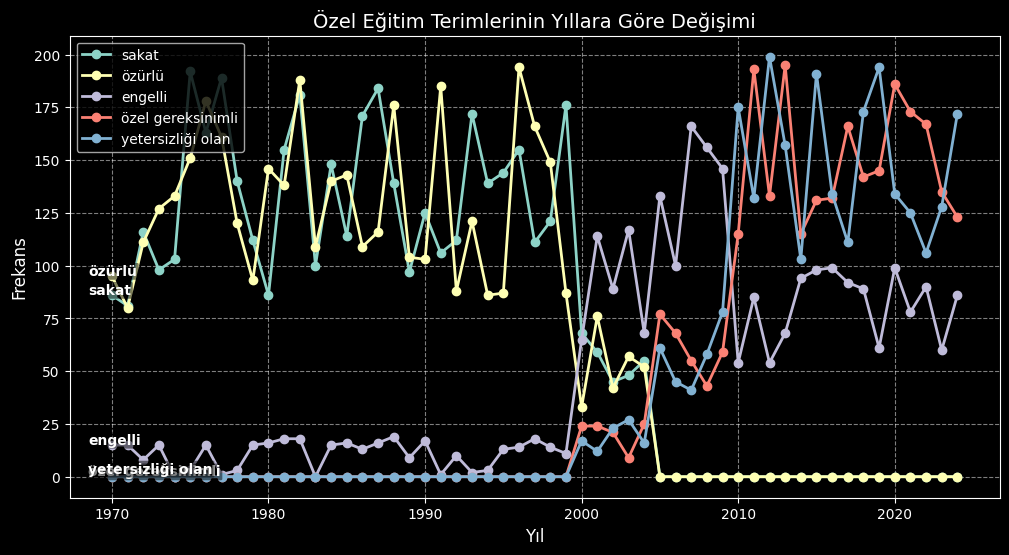

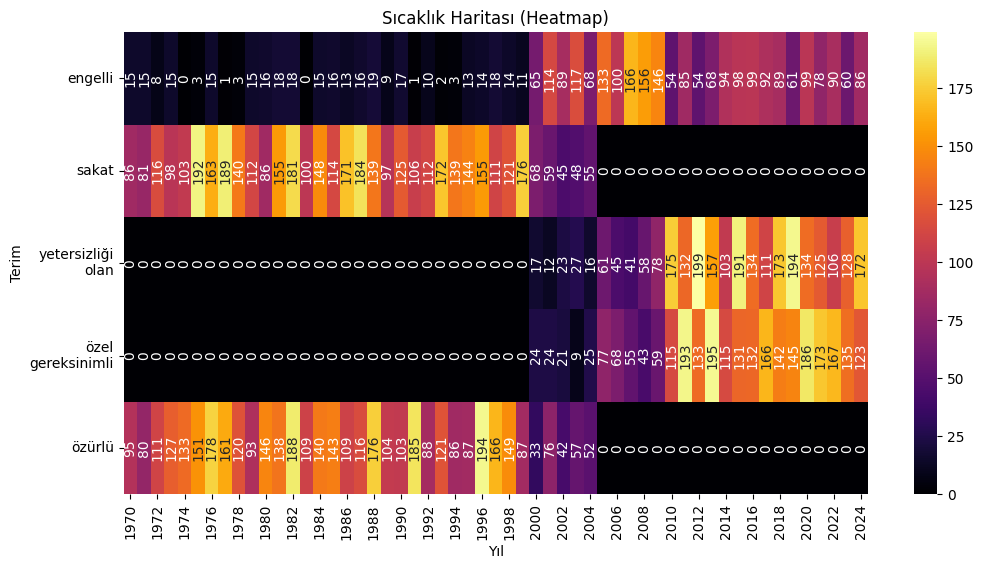

In [2]:
# Sample Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veriyi yÃ¼kleme
file_path = "data/ankara_oe/sample_terms.csv"
df = pd.read_csv(file_path)

# YÄ±la gÃ¶re toplam frekans hesaplama
df_terms_yearly = df.groupby(["year", "term"])["frequency"].sum().reset_index()

# **SonuÃ§larÄ± gÃ¶sterme**
print(df_terms_yearly)

# Analiz edilecek bazÄ± terimleri seÃ§me
selected_terms = ["sakat", "Ã¶zÃ¼rlÃ¼", "engelli", "yetersizliÄŸi olan", "Ã¶zel gereksinimli"]

# Ã‡izgi grafiÄŸi 
# Dark theme
plt.style.use("dark_background")

plt.figure(figsize=(12, 6))

# YÄ±l sÃ¼tununun integer olduÄŸundan emin ol
df_terms_yearly["year"] = df_terms_yearly["year"].astype(int)

# **Son yÄ±lÄ±n frekanslarÄ±nÄ± hesapla ve en yÃ¼ksekten en dÃ¼ÅŸÃ¼ÄŸe sÄ±rala**
latest_year = df_terms_yearly["year"].max()
last_year_frequencies = df_terms_yearly[df_terms_yearly["year"] == latest_year].set_index("term")["frequency"].to_dict()

# **SÄ±ralama: En yÃ¼ksek frekanstan en dÃ¼ÅŸÃ¼k frekansa**
sorted_terms = sorted(selected_terms, key=lambda t: last_year_frequencies.get(t, 0), reverse=False)


# **Etiketlerin Ã¼st Ã¼ste binmesini Ã¶nlemek iÃ§in**
used_positions = set()
min_spacing = 1.3  # Etiketler arasÄ±nda en az kaÃ§ birim boÅŸluk olacak

for term in sorted_terms:
    subset = df_terms_yearly[df_terms_yearly["term"] == term]
    plt.plot(subset["year"], subset["frequency"], marker="o", linestyle="-", linewidth=2, markersize=6, label=term)

    # Ä°lk yÄ±lÄ±n deÄŸerini al
    first_row = subset.iloc[0]
    label_x = int(first_row["year"])
    label_y = first_row["frequency"]

    # **EÄŸer aynÄ± y ekseninde baÅŸka bir etiket varsa, en yakÄ±n boÅŸ yeri bul ve kaydÄ±r**
    while label_y in used_positions:
        label_y += min_spacing

    used_positions.add(label_y)

    # **Etiketi ilk yÄ±lÄ±n iÃ§ine biraz girintili yerleÅŸtir**
    plt.text(label_x - 1.5, label_y + 0.4, term, fontsize=10, ha="left", color="white", fontweight="bold",
             bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", boxstyle="round,pad=0.1"))

plt.xlabel("YÄ±l", fontsize=12, color="white")
plt.ylabel("Frekans", fontsize=12, color="white")
plt.title("Ã–zel EÄŸitim Terimlerinin YÄ±llara GÃ¶re DeÄŸiÅŸimi", fontsize=14, color="white")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

# Bar grafiÄŸi
"""plt.figure(figsize=(12, 6))

for term in selected_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.bar(subset["Year"], subset["Frekans"], label=term, alpha=0.7)

plt.xlabel("YÄ±l")
plt.ylabel("Frekans")
plt.title("Ã–zel EÄŸitim Terimlerinin YÄ±llara GÃ¶re DeÄŸiÅŸimi (Bar GrafiÄŸi)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")

#plt.show()
"""
# Alan GrafiÄŸi (Stacked Area Chart)
"""plt.figure(figsize=(12, 6))

for term in selected_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.fill_between(subset["Year"], subset["Frekans"], alpha=0.6, label=term)

plt.xlabel("YÄ±l")
plt.ylabel("Frekans")
plt.title("Ã–zel EÄŸitim Terimlerinin YÄ±llara GÃ¶re DeÄŸiÅŸimi (Alan GrafiÄŸi)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
"""
# Heatmap (SÄ±caklÄ±k HaritasÄ±)
# Veriyi pivotlayarak heatmap'e uygun hale getirme
filtered_df_terms_yearly = df_terms_yearly[df_terms_yearly['term'].isin(selected_terms)]
df_pivot = filtered_df_terms_yearly.pivot(index="term", columns="year", values="frequency").fillna(0)

plot_frequency_heatmap(df_pivot, color_map="inferno", x_label="YÄ±l", y_label="Terim")
